In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, recall_score, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is not any missing values.

In [6]:
df.duplicated().sum()

0

Duplicate values in df are: 0

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


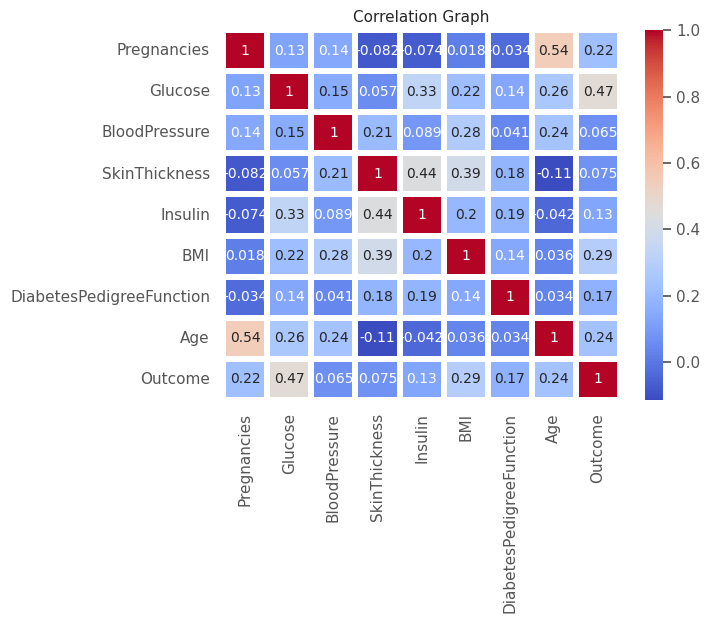

In [11]:
sns.heatmap(df.corr(), annot= True, fmt='0.2g',linewidths=4, cmap="coolwarm")
plt.title ("Correlation Graph" , fontsize = 11 )
plt.show()

In [12]:
df.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [13]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [14]:
df.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [15]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


### Visualization

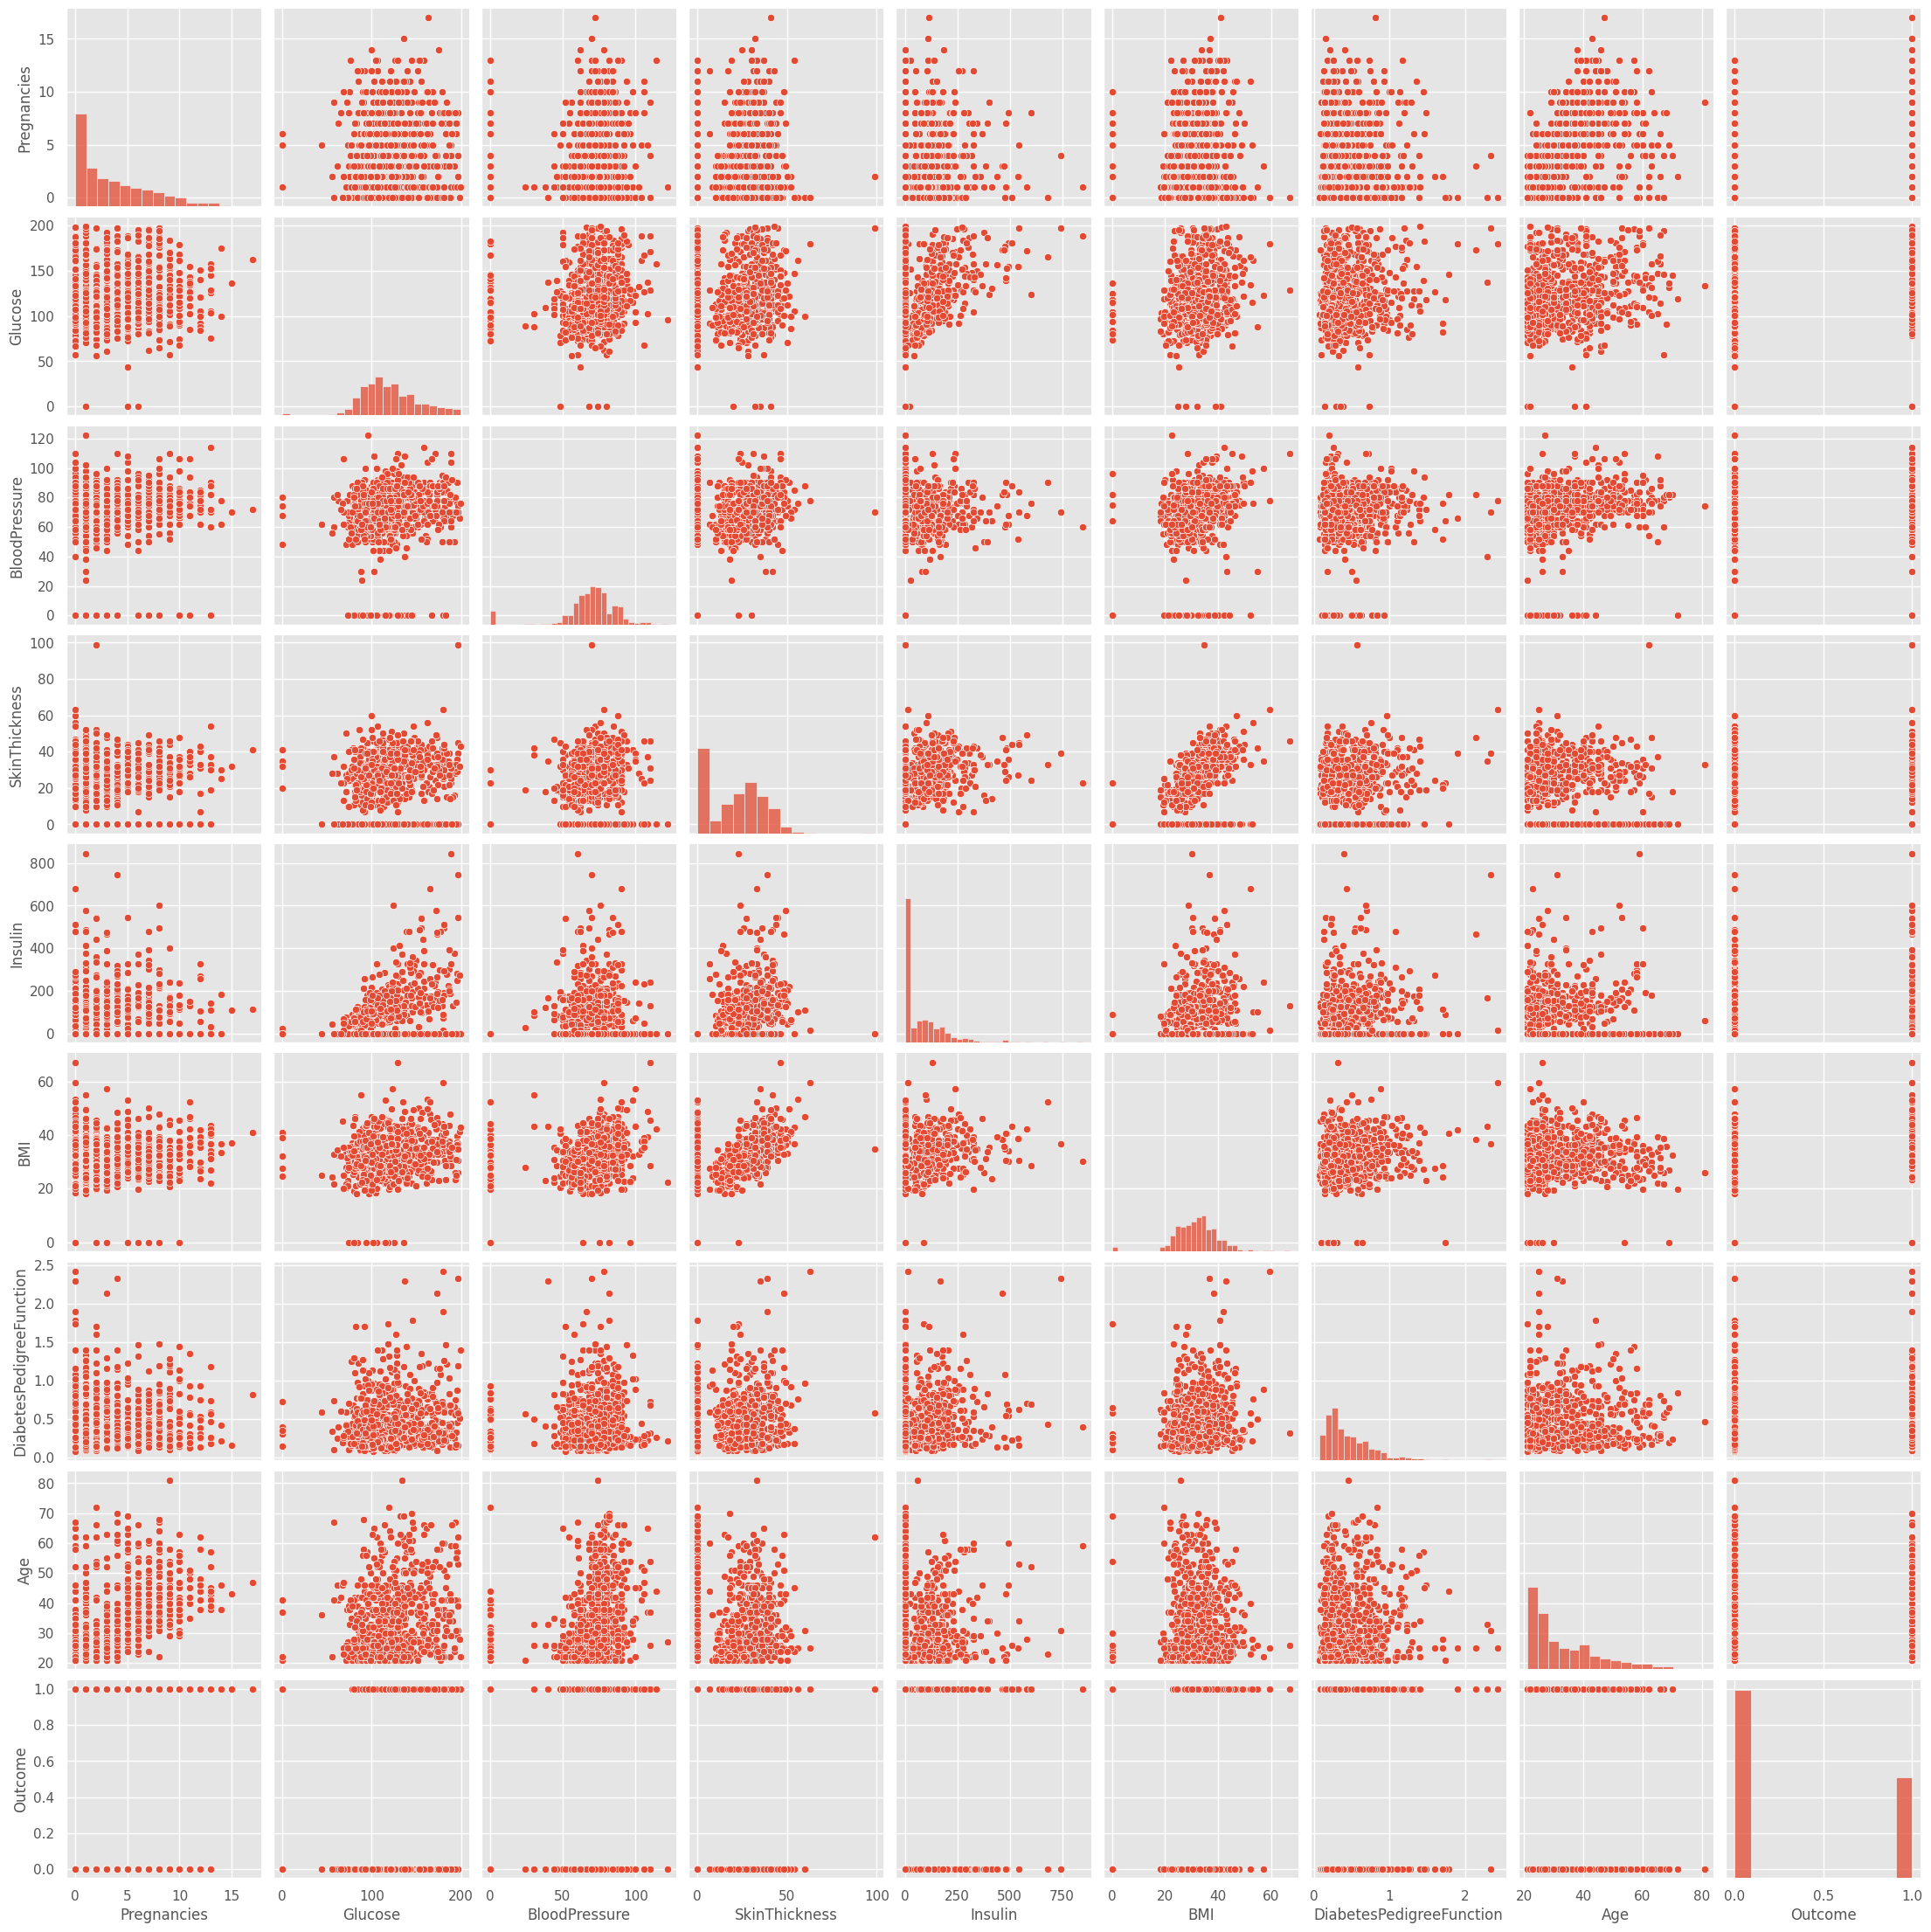

In [16]:
sns.pairplot(df)


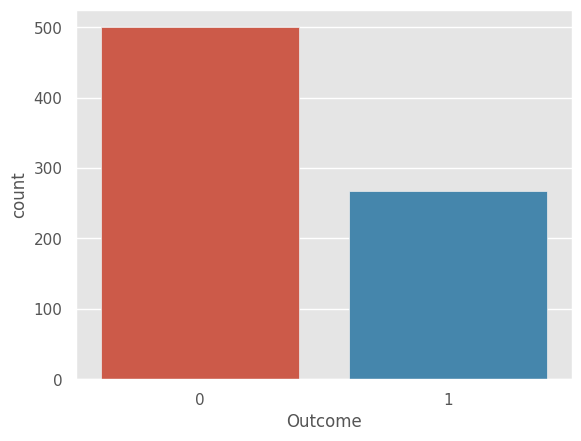

In [17]:
sns.countplot(x='Outcome', data = df)
plt.show()

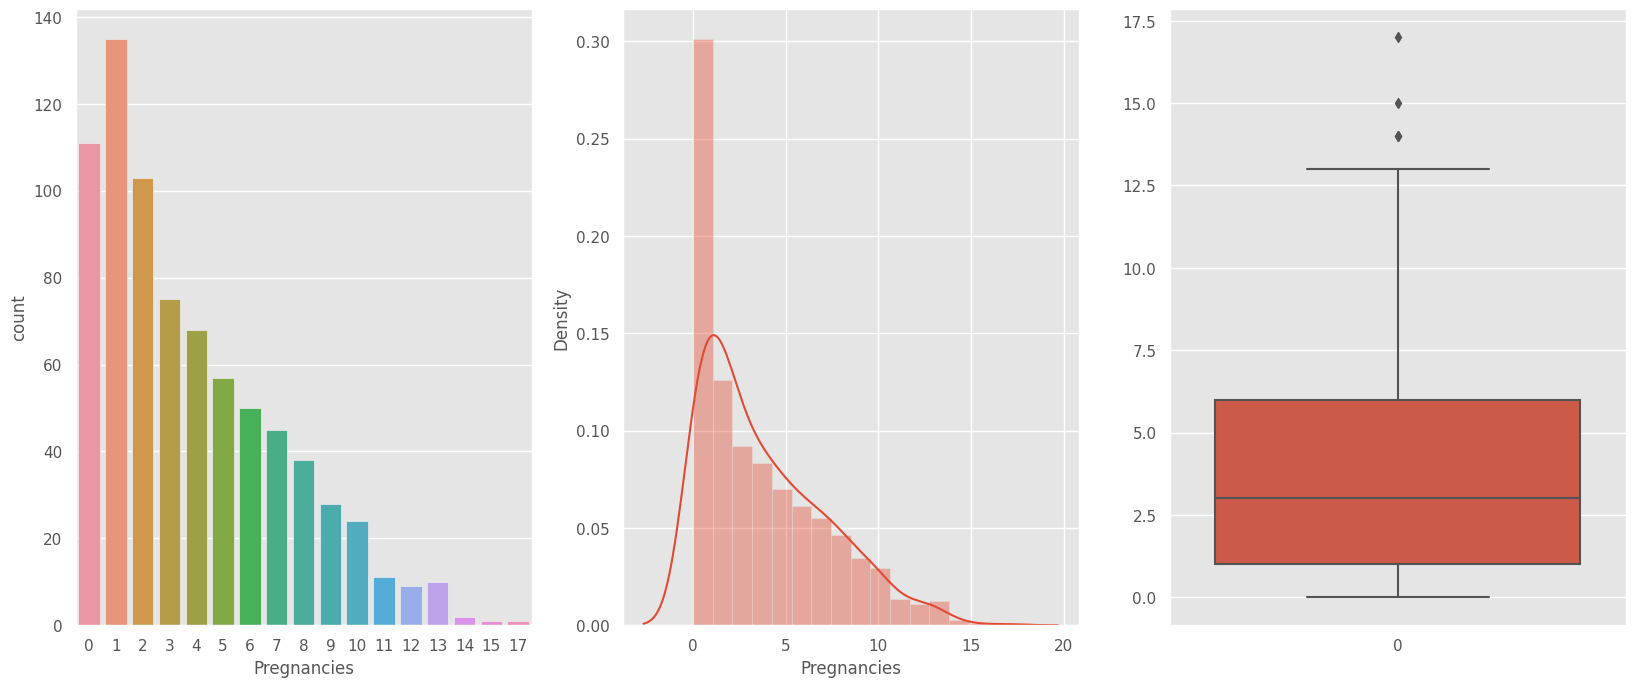

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.countplot(x= 'Pregnancies',data = df)


plt.subplot(1,3,2)
sns.distplot( df['Pregnancies'])


plt.subplot(1,3,3)
sns.boxplot( df['Pregnancies'])
plt.show()


In [19]:
df['Glucose'].max()


199

In [20]:
df['Glucose'].min()

0

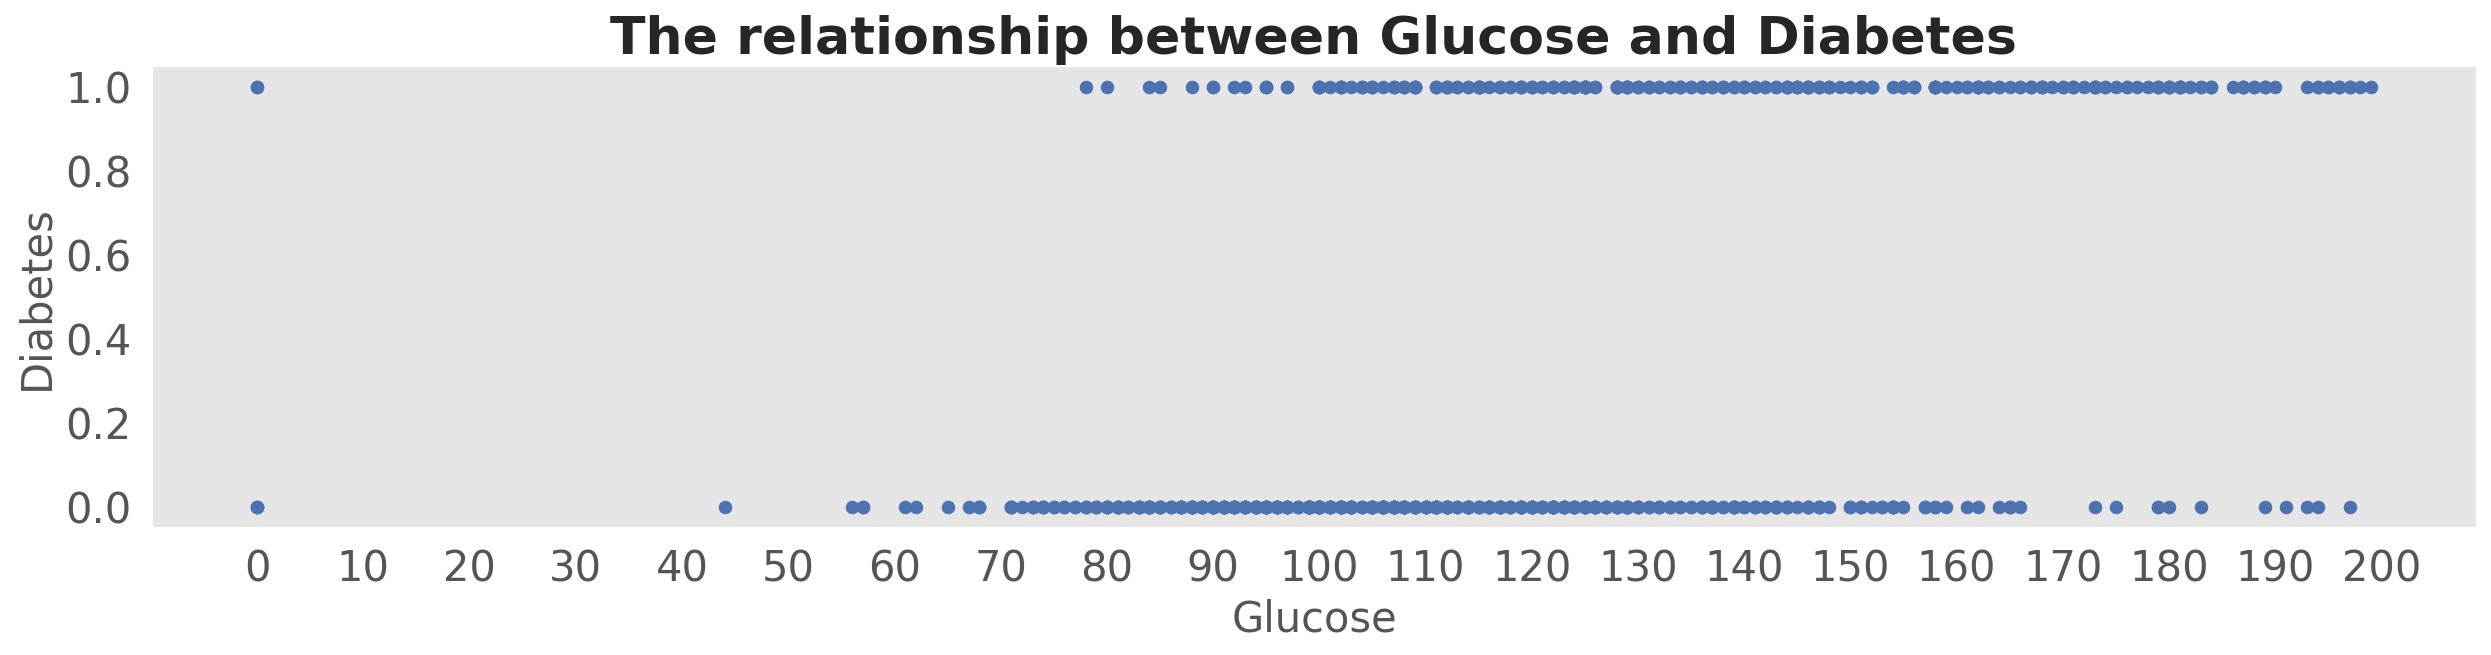

In [21]:
plt.figure(figsize = [20, 4] , dpi = 150)

plt.scatter(df['Glucose'], df['Outcome'], color = "b")

plt.title('The relationship between Glucose and Diabetes', weight='bold', fontsize = 25)
plt.xticks (range (0 , 204 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)


plt.grid ()
plt.show()



In [22]:
df['Age'].max()


81

In [23]:
df['Age'].min()

21

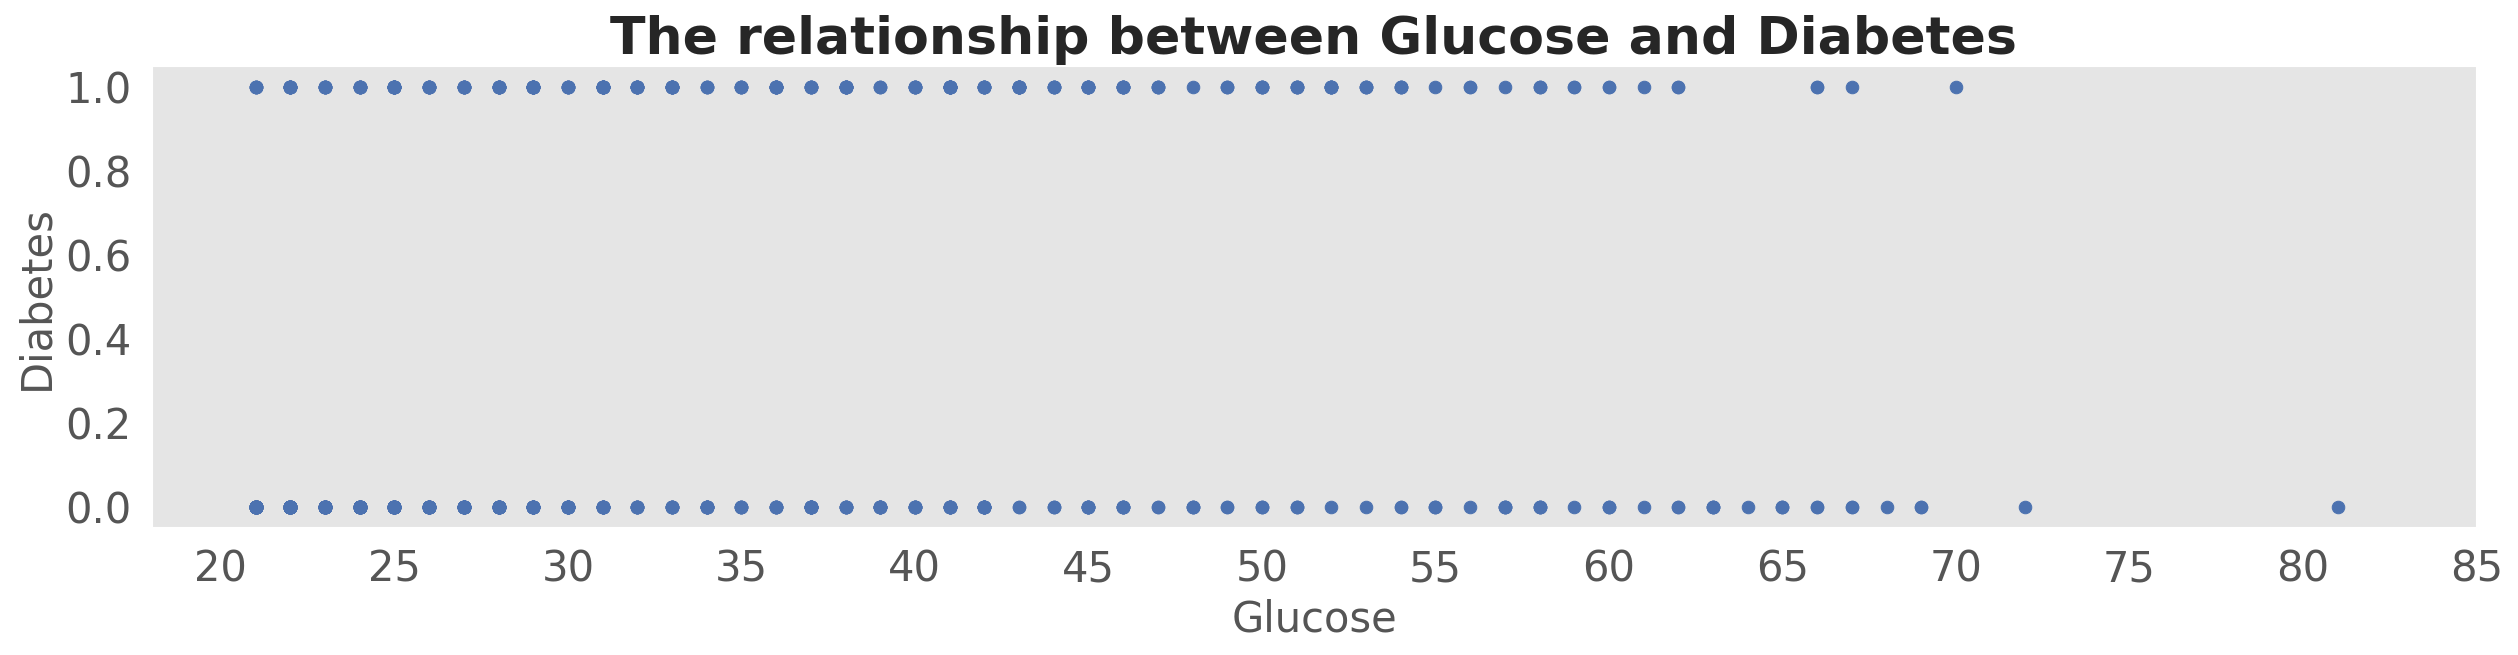

In [24]:
plt.figure(figsize = [20, 4] , dpi = 150)

plt.scatter(df['Age'], df['Outcome'], color = "b")

plt.title('The relationship between Glucose and Diabetes', weight='bold', fontsize = 25)
plt.xticks (range (20 , 86 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)


plt.grid ()
plt.show()


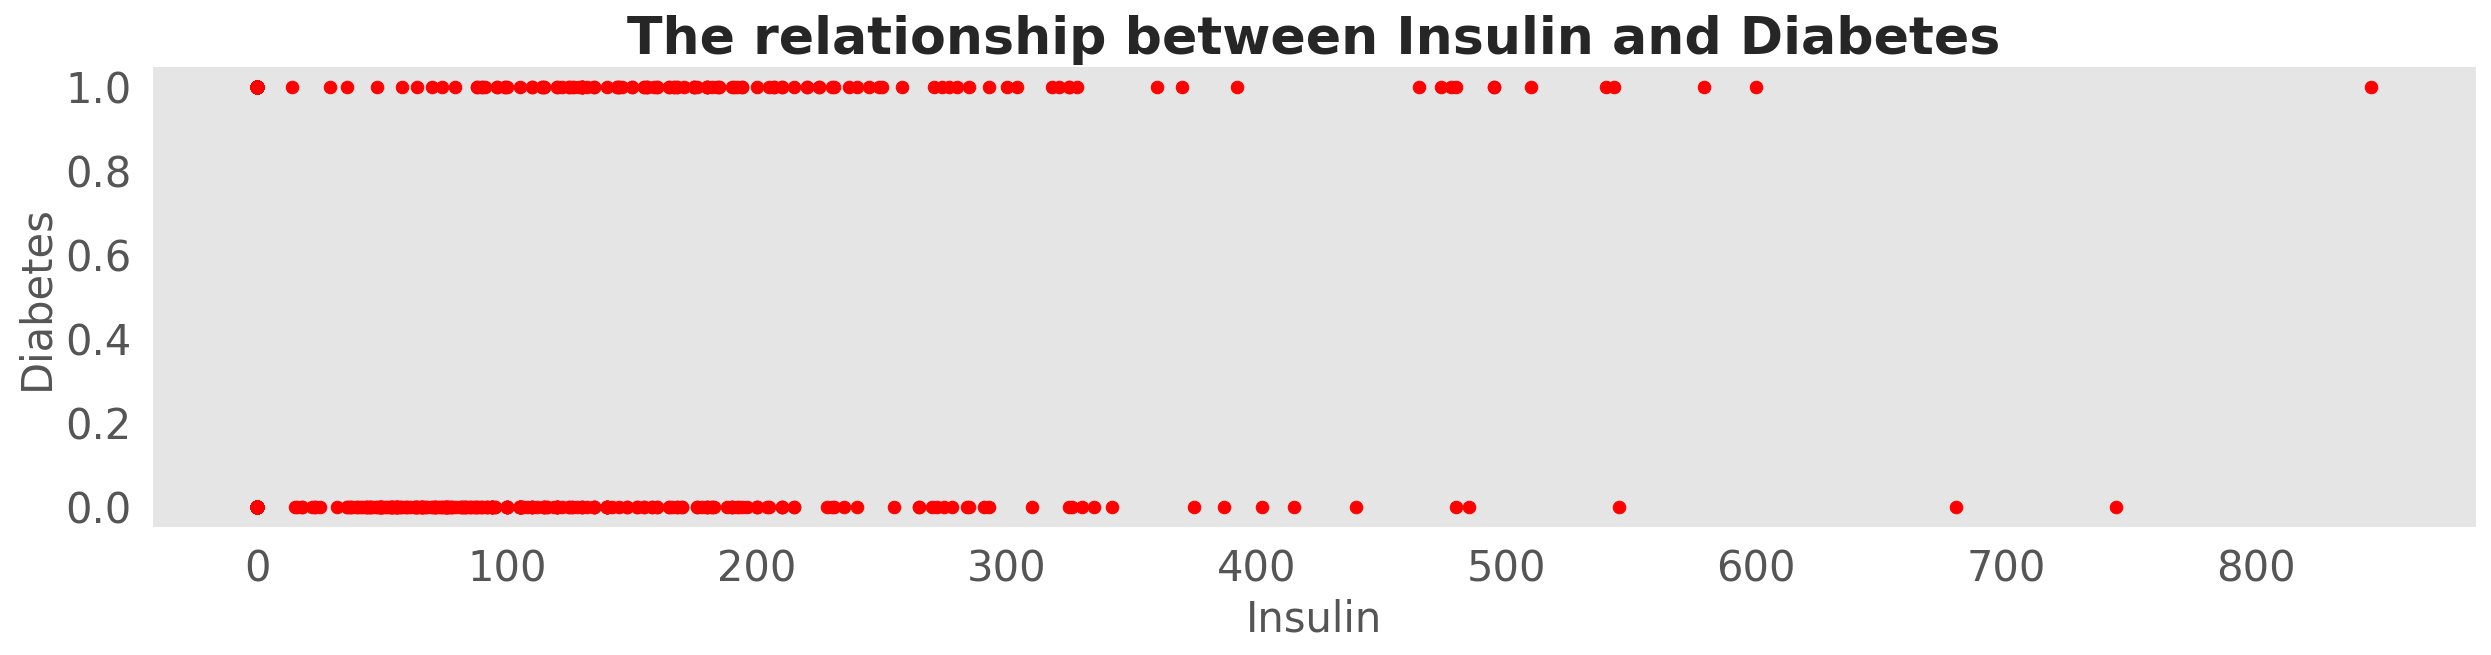

In [25]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Insulin"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()


 Twice as many Women with insulin over 450 have diabetes compared to Women without diabetes

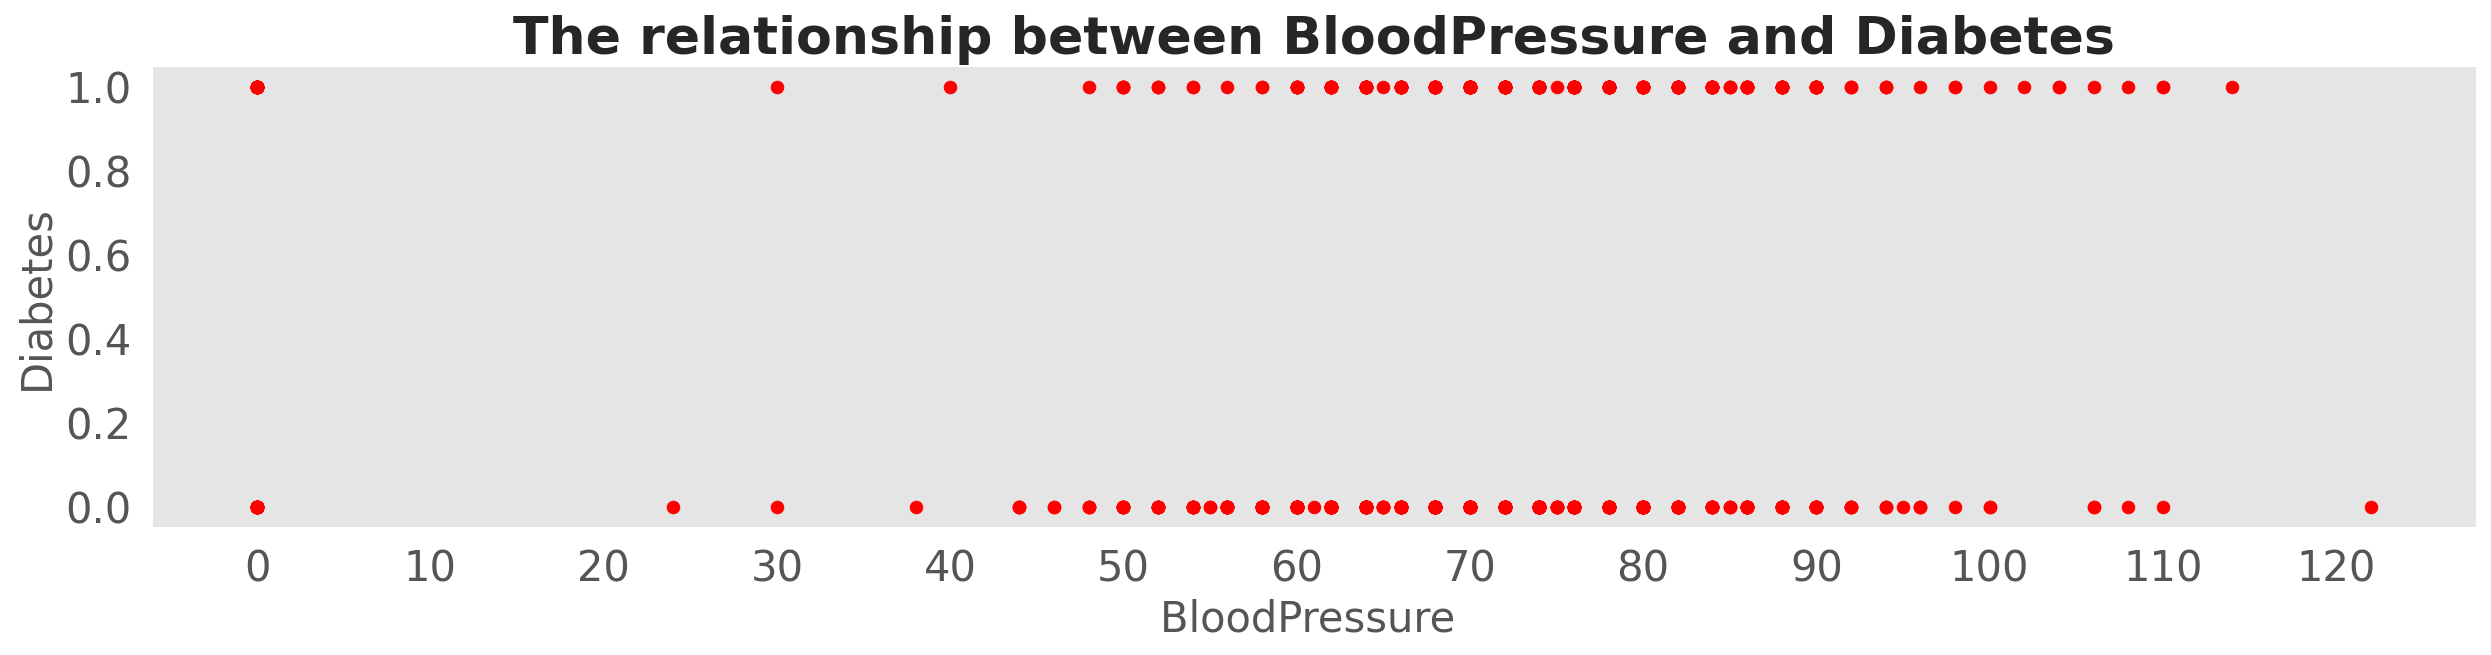

In [26]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure ', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

There is no relationship between Women with blood pressure and those who have diabetes

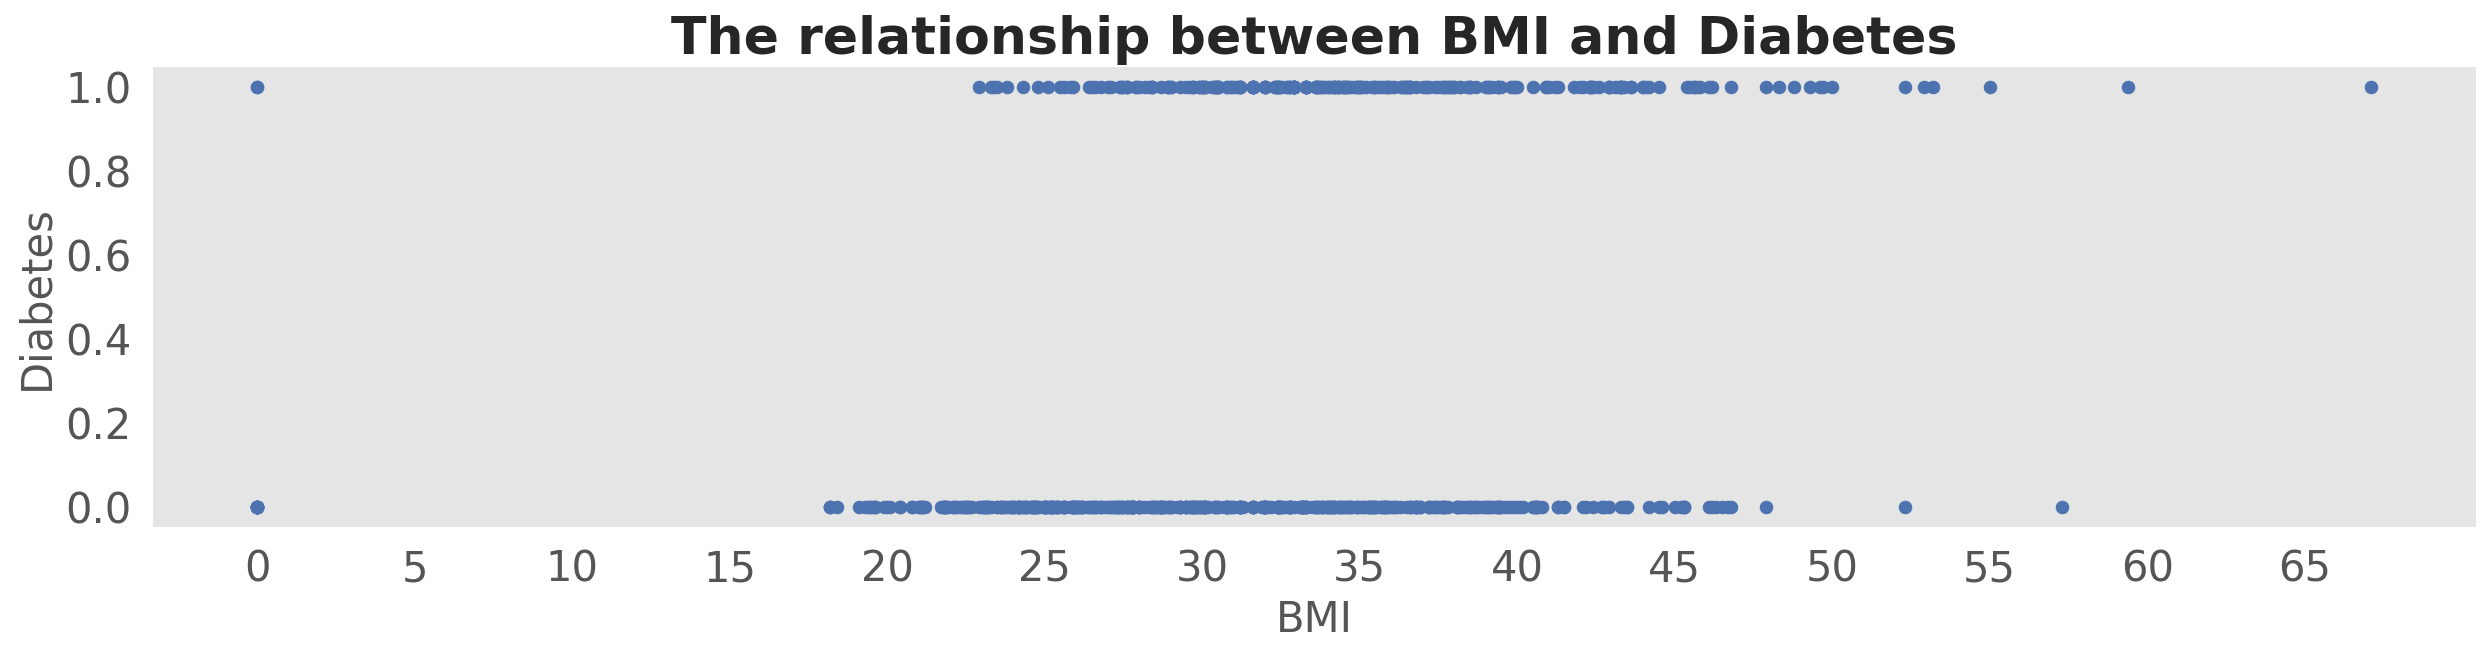

In [27]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Outcome"] , color = "b")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

Women with a high BMI have a greater chance of developing diabetes.

In [28]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    outliers = ((df[feature] < lower) | (df[feature] > upper)).sum()
    
    # Calculate total number of data points
    total_points = df[feature].shape[0]
    
    # Print the number and percentage of outliers
    
    print(f"Total Outliers in {feature}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Pregnancies: 4 -- 0.52%
Total Outliers in Glucose: 5 -- 0.65%
Total Outliers in BloodPressure: 45 -- 5.86%
Total Outliers in SkinThickness: 1 -- 0.13%
Total Outliers in Insulin: 34 -- 4.43%
Total Outliers in BMI: 19 -- 2.47%
Total Outliers in DiabetesPedigreeFunction: 29 -- 3.78%
Total Outliers in Age: 9 -- 1.17%
Total Outliers in Outcome: 0 -- 0.0%


In [29]:
if outliers>0:
    df = df.loc[(df[feature]<=upper) & (df[feature]>=lower) ]

# create models

In [30]:
x = df.drop(['Outcome'],axis = 1)
y =df['Outcome']

In [31]:
ros = RandomOverSampler(random_state=40)

x_ros,y_ros =ros.fit_resample(x,y)
# from imblearn.under_sampling import RandomUnderSampler

# now split data

In [32]:
x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros, test_size = 0.2, random_state = 40)

In [33]:
model_log =LogisticRegression ()
model_log.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = model_log.predict(x_test) # Predicted class labels from test features
list(y_pred)[:5]

[1, 1, 1, 0, 1]

In [35]:
y_predicted_proba = model_log.predict_proba(x_test)# Predicted probabilities from test features

y_predicted_proba[:5]

array([[0.48937285, 0.51062715],
       [0.45239654, 0.54760346],
       [0.36401196, 0.63598804],
       [0.7341018 , 0.2658982 ],
       [0.26616501, 0.73383499]])

In [36]:
print ("Accuracy: " , accuracy_score (y_test , y_pred))


Accuracy:  0.77


In [37]:
model_log.coef_

array([[ 1.72441038e-01,  3.01218626e-02, -1.43783068e-02,
         3.66966599e-03, -9.21759307e-04,  8.12144251e-02,
         1.09106158e+00,  1.00504555e-02]])

In [38]:
confusion_matrix (y , model_log.predict (x))

array([[385, 115],
       [ 67, 201]])

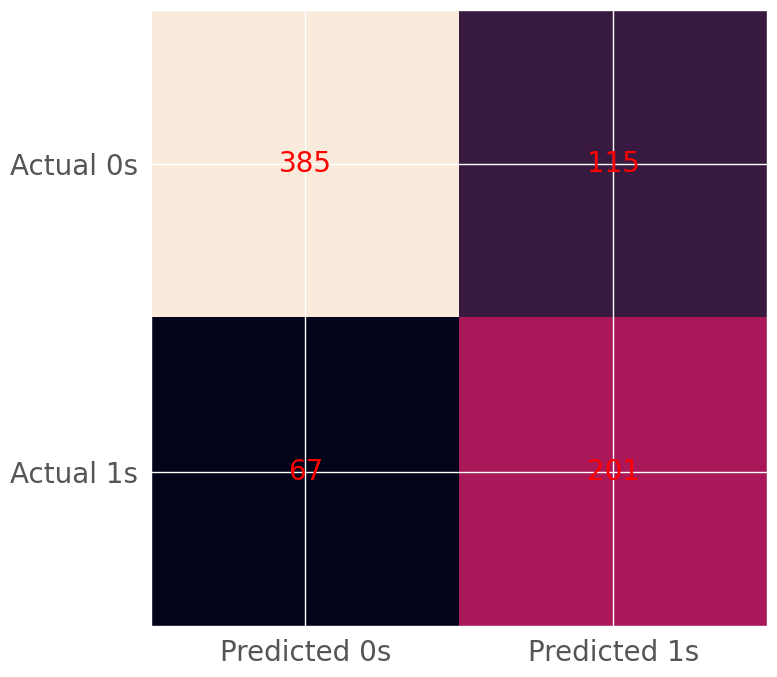

In [39]:
cm =confusion_matrix (y , model_log.predict (x))

fig , ax = plt.subplots (figsize = (8,8))
ax.imshow (cm)
# ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual 0s" , "Actual 1s"))

ax.tick_params(axis='both', which='major', labelsize=20)
#ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.xticks(fontsize=14, rotation=90)

ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="red", fontsize = 20 )
plt.show()

In [40]:
print (classification_report (y , model_log.predict (x)))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       500
           1       0.64      0.75      0.69       268

    accuracy                           0.76       768
   macro avg       0.74      0.76      0.75       768
weighted avg       0.78      0.76      0.77       768



# i will test another models =>

In [41]:
algorithm = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','SVC']
acc=[]
recall= []
RMSE = []
f11 = []

In [42]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
# model3 = RandomForestClassifier( n_estimators = 130,class_weight ='balanced')
model3 = RandomForestClassifier(class_weight ='balanced',criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
model4 = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
model5 = SVC()


In [43]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    score = accuracy_score(pre,y_test)
    recal = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    acc.append(score)
    recall.append(recal)
    f11.append(f1)
    RMSE.append(rmse)
    sns.heatmap(confusion_matrix(pre,y_test),annot =True)
    
    print(model)
    
    print(f'The accuracy of model is :{score} and the recall is {recal} and the f1 score is : {f1} and the mean spaired erroe is :{rmse}')

LogisticRegression()
The accuracy of model is :0.77 and the recall is 0.7755102040816326 and the f1 score is : 0.7676767676767676 and the mean spaired erroe is :0.47958315233127197


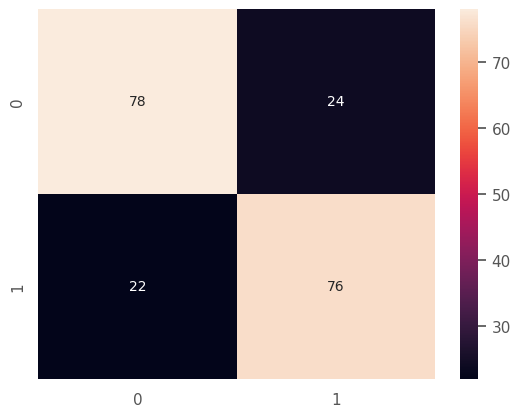

In [44]:
models(model1)

DecisionTreeClassifier()
The accuracy of model is :0.815 and the recall is 0.7692307692307693 and the f1 score is : 0.8294930875576038 and the mean spaired erroe is :0.4301162633521313


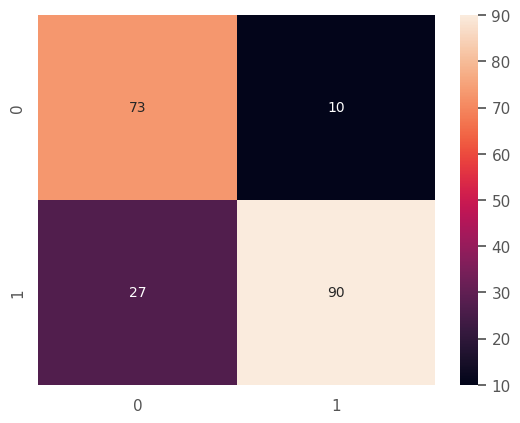

In [45]:
models(model2)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=0.75, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)
The accuracy of model is :0.845 and the recall is 0.7948717948717948 and the f1 score is : 0.8571428571428572 and the mean spaired erroe is :0.39370039370059057


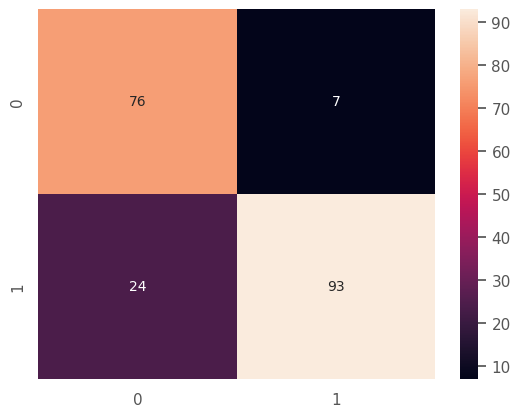

In [46]:
models(model3)

GradientBoostingClassifier(loss='exponential', n_estimators=150)
The accuracy of model is :0.82 and the recall is 0.7962962962962963 and the f1 score is : 0.826923076923077 and the mean spaired erroe is :0.4242640687119285


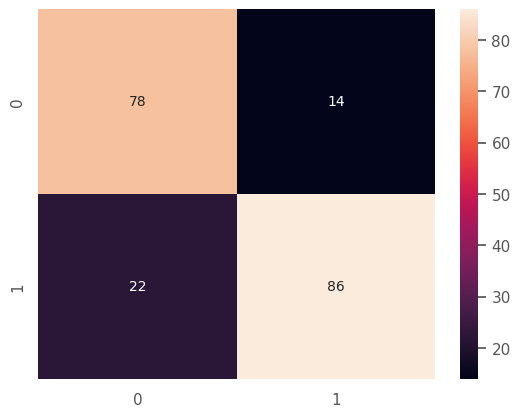

In [47]:
models(model4)

SVC()
The accuracy of model is :0.795 and the recall is 0.8105263157894737 and the f1 score is : 0.7897435897435898 and the mean spaired erroe is :0.4527692569068708


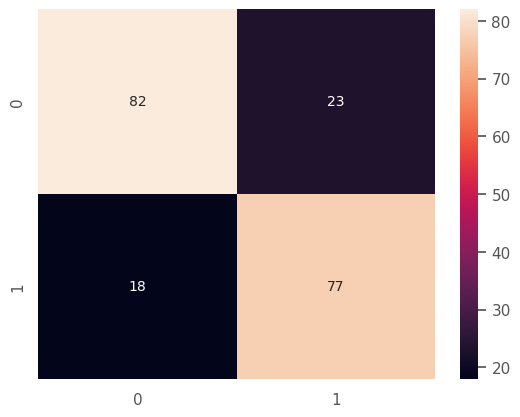

In [48]:
models(model5)

In [49]:
df2 = pd.DataFrame({'Algorithm':algorithm, 'Accuracy': acc,'recall' : recall,"f1":f11,'RMSE':RMSE})
df2

,Algorithm,Accuracy,recall,f1,RMSE
0,LogisticRegression,0.770,0.775510,0.767677,0.479583
1,DecisionTreeClassifier,0.815,0.769231,0.829493,0.430116
2,RandomForestClassifier,0.845,0.794872,0.857143,0.393700
3,GradientBoostingClassifier,0.820,0.796296,0.826923,0.424264
4,SVC,0.795,0.810526,0.789744,0.452769


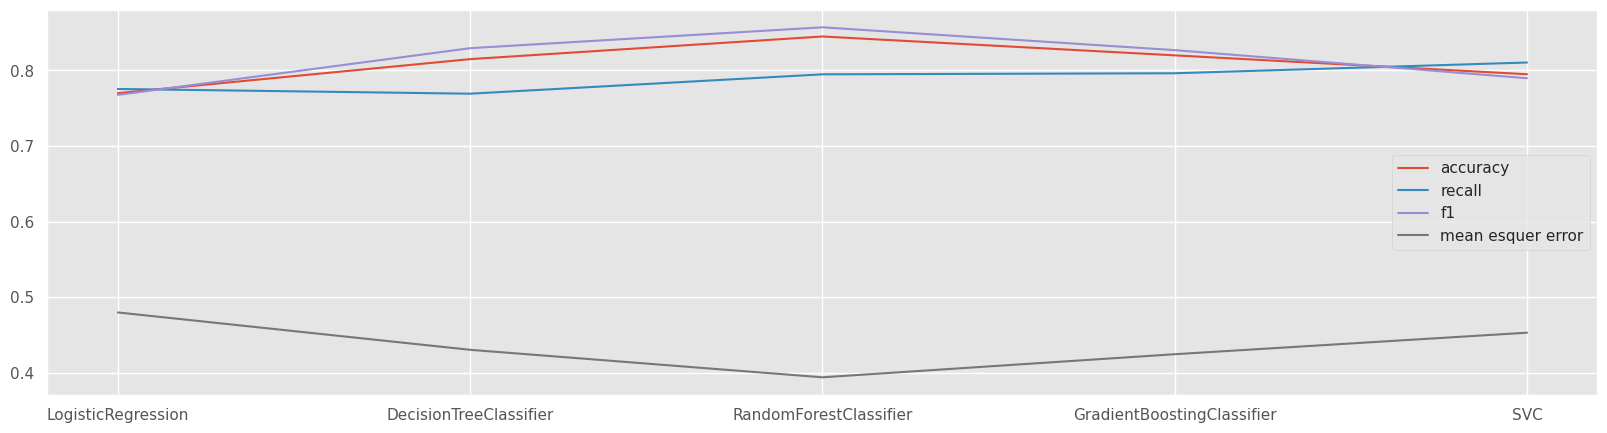

In [50]:
fif,ax= plt.subplots(figsize = (20,5))
plt.plot(df2.Algorithm, acc, label='accuracy')
plt.plot(df2.Algorithm, recall,label='recall')
plt.plot(df2.Algorithm, f11,label='f1')
plt.plot(df2.Algorithm, RMSE,label='mean esquer error')

plt.legend()
plt.show()


# the best model is RandomForestClassifie

# Let's check whether the person have diabetes or not using some random values

In [51]:
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
501,3,84,72,32,0,37.2,0.267,28,0
589,0,73,0,0,0,21.1,0.342,25,0


In [52]:
y_predict = model4.predict([[5,104,74,0,0,28.8,0.153,48]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[0]
Non Diabetic


In [53]:
y_predict = model4.predict([[3,84,72,32,0,37.2,0.267,28]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[0]
Non Diabetic
